# Visualise the Part Localised by the `locnet`

In [8]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


In [2]:
# given the affine transformation theta
affine_trans_theta=torch.tensor([[-0.2182,  0.0000,  0.1042],
         [ 0.0000, -0.2182,  0.1401]])
affine_trans_theta


tensor([[-0.2182,  0.0000,  0.1042],
        [ 0.0000, -0.2182,  0.1401]])

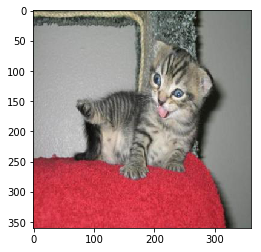

In [3]:
# Open the image and visualise
image=Image.open('images/3456.jpg')  # type is PIL image. to get the size, use image.size
plt.imshow(image)

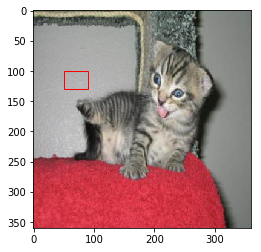

In [4]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

The implementation of Affine Transformation.

Need to make clear how the affine transformation work.

Reference:
    https://torchgeometry.readthedocs.io/en/v0.1.2/geometric.html

## Affine Transformation


**I'm going to implement the affine transformation in details**
### 1. Torch Implementation
Using the `affine_grid()` and `grid_sample()`.

Image size: `(channel, H, W)`

In my project, the parameters I'm learning are $a,t_x,t_y$. The $a$ controls the scale, $t_x,t_y$ controls the translations.

$\left[\begin{array}{lll}{a} & {0} & {t_{x}} \\ {0} & {a} & {t_{y}}\end{array}\right]$


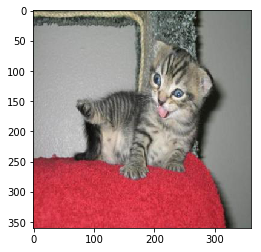

In [6]:
plt.imshow(image)# PIL.image type 
img=transforms.ToTensor()(image)

In [20]:
# just do the scale transformation, 0.5 x and 0.5 y
theta=torch.tensor([[0.3,0,0.5],[0,0.3,0.4]])

# grid = F.affine_grid(theta.unsqueeze(0),(1,3,180,180))  
grid = F.affine_grid(theta.unsqueeze(0), img.unsqueeze(0).size())  
# the second para in `affine_grid` control the size of the output image
output = F.grid_sample(img.unsqueeze(0), grid)
new_img_torch = output[0]

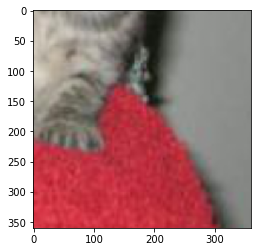

In [21]:
new_img=transforms.ToPILImage()(new_img_torch)
plt.imshow(new_img)



### 2. Abs coordinates to implement
Build the Function to get the abs coordinates of the local part for the affine transformation.

**Note**:
1. The values of theta. In the operation, the first axis is the horizontal (x), the second is the vertical (y). While in the tensor/ndarray type image data, they are C * H * W/ H * W * C. 



In [13]:
def theta_to_abs_coordinate(theta,image_size):
    '''
    args:
        theta: parameters of the affine transformation a,t_x,t_y. s is the scale value, t is the translation value
        image_size: (C * H * W)
    return: 
        coordinates (x1,y1) and the size of H, W
    '''
    s,tx,ty = theta
    x_all=image_size[2]
    y_all=image_size[1]
    
    size_part_h = s*image_size[1]
    size_part_w = s* image_size[2]
    
    x1=round((1-s+tx)*x_all/2)
    y1=round((1-s+ty)*y_all/2)
#     print(x1)
#     print(y1)
    return (int(x1),int(y1)), int(size_part_h),int(size_part_w)

def plot_img_after_affine(x1,y1,H,W,image):
    '''
    args:
        x1,y1: the coordinates of the x1,y1 
        H,W: the size of the local part
        image: the image tensor (C * H * W)
    '''
    img_part=transforms.ToPILImage()(image[:,y1:y1+H,x1:x1+W])
    plt.imshow(img_part)
    plt.show()


In [14]:
theta=[0.3,0.5,0.4]
image_size=(3,360,360)
(x,y),H,W=theta_to_abs_coordinate(theta,image_size)


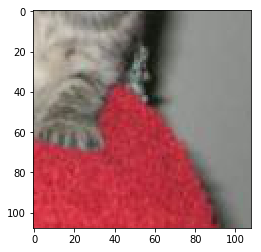

In [15]:
# 0.5 x and 0.5 y
plot_img_after_affine(x,y,H,W,img)

## Localise the relative part

In [16]:
def localise_part_visualisation(image,x1,y1,patch_size,color):
    '''
    args:
        patch_size: tuple of (H,W)
    '''
    H,W=patch_size
    
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Create a Rectangle patch
    rect = patches.Rectangle((x1,y1),W,H,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    plt.show()

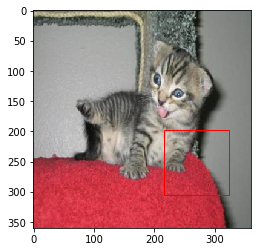

In [17]:
# localise it and visualise the patch
localise_part_visualisation(image,x,y,(H,W),'r')